#  Video Game Sales EDA & Regression Project

This notebook explores the video game sales dataset and sets the stage for a regression model to predict global sales.

In [65]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
# Load the dataset
df = pd.read_csv("../Data/Video_Games_Sales_as_at_22_Dec_2016.csv")

# Exploratory Data Analysis

In [15]:
#: Quick look at the data
print("\nShape of dataset:", df.shape)
df.head()


Shape of dataset: (16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains over 16,000 rows and 16 columns related to video game metadata and sales

### Lets see what type of data we a re working with  and they are any missing values. 

In [17]:
# Data info (to check missing values and types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [71]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

The numerical columns are how it supposed to be, and categorical columns are object (execpt for Users_score and Rating). 

Most of our missing values are past the 10th columns ('Global Sales').  

Since global sales is gonna be our target, we dont want to keep (at least for now  columns with too much missing values).

In [79]:
#Drop rows where 'Global_sales' is missing 
df = df.dropna(subset=['Global_Sales'])

# Drop rows where 'Year_of_sales' and 'Genre' is missing 
df = df.dropna(subset=['Year_of_Release', 'Genre'])

df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8465
Critic_Count       8465
User_Score         6608
User_Count         8985
Developer          6541
Rating             6679
dtype: int64

#### Now lets fix the User_score columns 

In [93]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score'].dtype

dtype('float64')

### So we gonna try to focus on the sales and see how each market react 

Here the idea is gonna be to see if a game works well in a market (NA) it's likely to work well in an other market. So let's dive in the sales by Genre by region. 

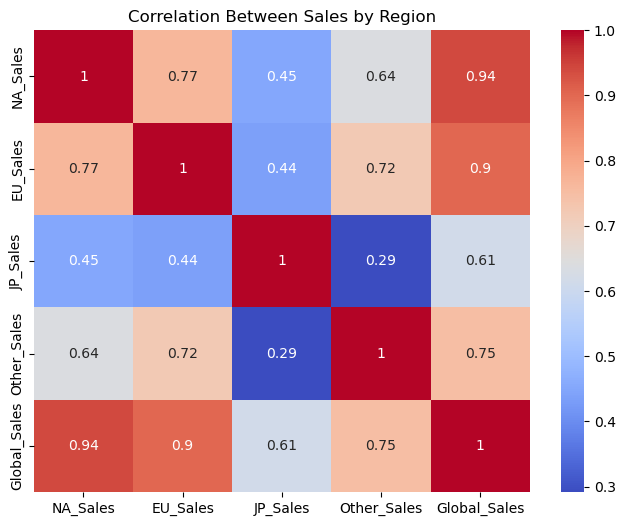

In [99]:
#lets start with a heatmap 
plt.figure(figsize=(8,6))
sales_corr = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].corr()
sns.heatmap(sales_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Sales by Region")
plt.show()

We can se here that NA_sales and EU_sales are highly correlated to Global_sales, but JP_sales behave a little differently. 

C:\Users\REBUILD\AppData\Local\Temp\ipykernel_186732\1787973732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')


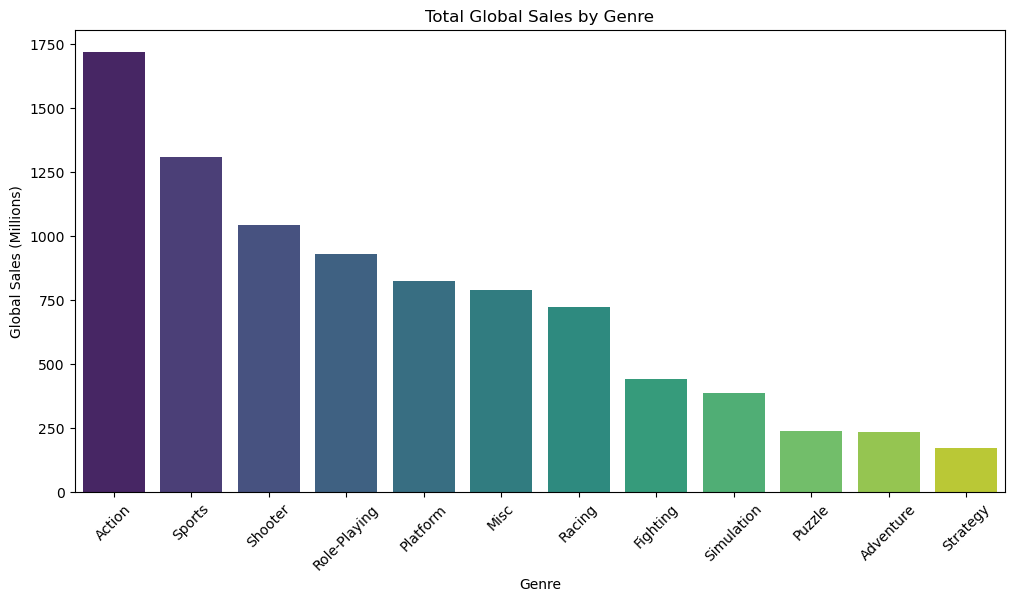

In [102]:
#Global Sales by genre 
plt.figure(figsize=(12,6))
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title("Total Global Sales by Genre")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.show()

The most popular genre in all market combined (Global_sales) are Action, Sports, Shooter and Role-Playing. 

It would be interesting to see now, the most popular Genre for each market. 


## NA most popular Genre 

C:\Users\REBUILD\AppData\Local\Temp\ipykernel_186732\2497348320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales_na.index, y=genre_sales_na.values, palette="viridis")


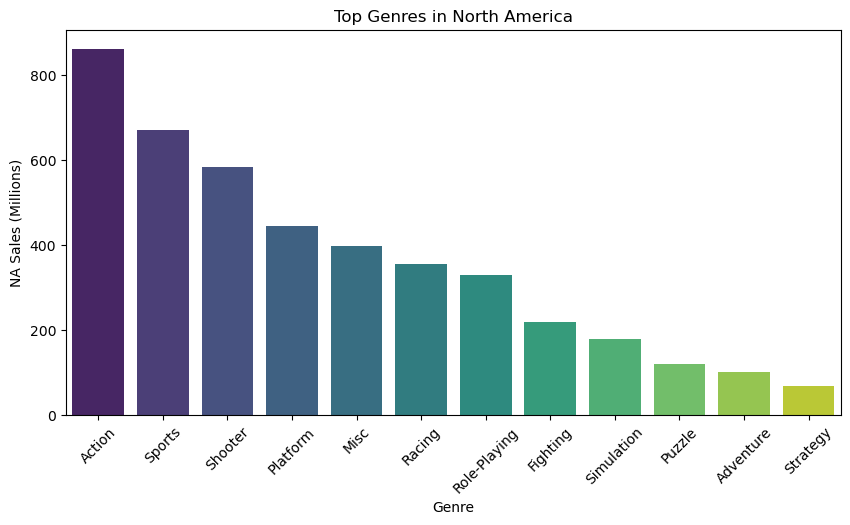

In [112]:
# NA most popular Genre 
plt.figure(figsize=(10,5))
genre_sales_na = df.groupby("Genre")["NA_Sales"].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales_na.index, y=genre_sales_na.values, palette="viridis")
plt.title("Top Genres in North America")
plt.ylabel("NA Sales (Millions)")
plt.xticks(rotation=45)
plt.show()

## EU Most popular genre 

C:\Users\REBUILD\AppData\Local\Temp\ipykernel_186732\1285755320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales_eu.index, y=genre_sales_eu.values, palette="Purples_d")


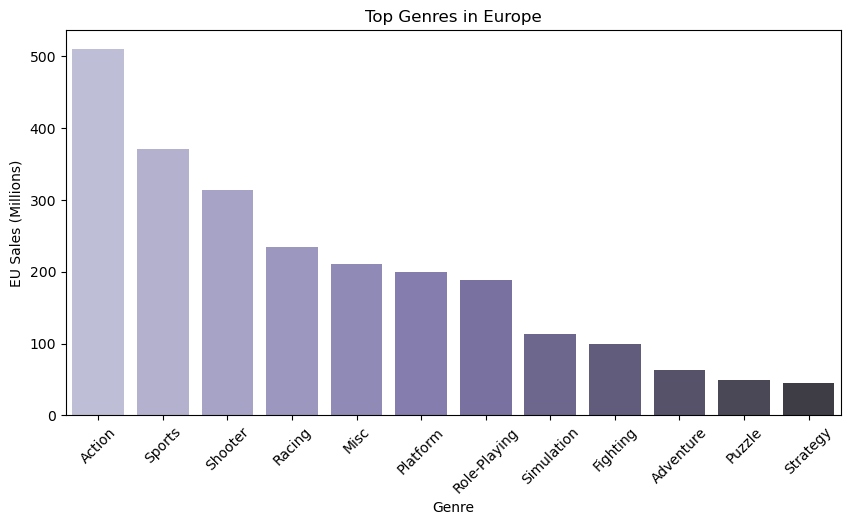

In [116]:
# Most popular genres in Europe
plt.figure(figsize=(10,5))
genre_sales_eu = df.groupby("Genre")["EU_Sales"].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales_eu.index, y=genre_sales_eu.values, palette="Purples_d")
plt.title("Top Genres in Europe")
plt.ylabel("EU Sales (Millions)")
plt.xticks(rotation=45)
plt.show()

## Japan Most popular Genre 


C:\Users\REBUILD\AppData\Local\Temp\ipykernel_186732\1793565094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales_jp.index, y=genre_sales_jp.values, palette="Reds_d")


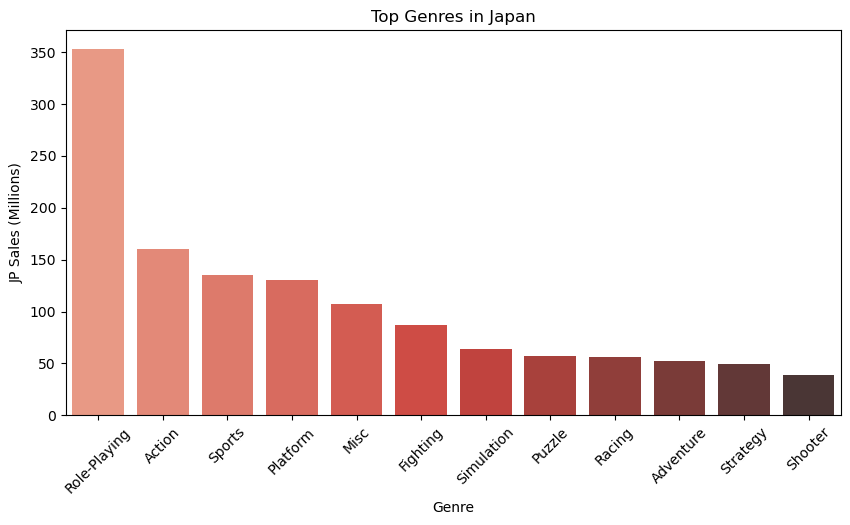

In [119]:
# Most popular genres in Japan
plt.figure(figsize=(10,5))
genre_sales_jp = df.groupby("Genre")["JP_Sales"].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales_jp.index, y=genre_sales_jp.values, palette="Reds_d")
plt.title("Top Genres in Japan")
plt.ylabel("JP Sales (Millions)")
plt.xticks(rotation=45)
plt.show()

## Other Region Most Popular Genre 

C:\Users\REBUILD\AppData\Local\Temp\ipykernel_186732\649025624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales_other.index, y=genre_sales_other.values, palette="Greens_d")


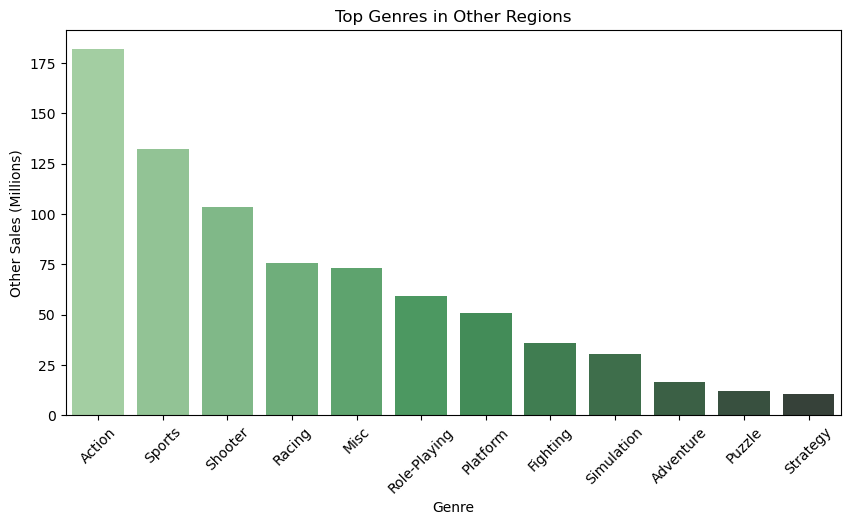

In [123]:
# Most popular genres in Other Regions
plt.figure(figsize=(10,5))
genre_sales_other = df.groupby("Genre")["Other_Sales"].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales_other.index, y=genre_sales_other.values, palette="Greens_d")
plt.title("Top Genres in Other Regions")
plt.ylabel("Other Sales (Millions)")
plt.xticks(rotation=45)
plt.show()


### Summary Genre by region 

In [126]:
# Group sales data by Genre and sum for each region
genre_region = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Sort each column (optional, for display)
genre_region = genre_region.sort_values(by="NA_Sales", ascending=False)

genre_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,863.17,510.99,160.15,182.22
Sports,671.20,371.33,134.93,132.21
Shooter,584.83,314.52,38.68,103.33
Platform,444.44,199.39,130.71,51.01
Misc,399.57,210.60,107.02,73.10
Racing,356.86,234.49,56.63,75.51
Role-Playing,330.04,188.24,353.44,59.41
Fighting,220.51,99.00,87.28,35.87
Simulation,180.67,113.35,63.64,30.59


In [136]:
# Top genres by NA sales
print("Top genres in North America:")
print(genre_region.sort_values(by="NA_Sales", ascending=False).head())

# Top genres by EU sales
print("\nTop genres in Europe:")
print(genre_region.sort_values(by="EU_Sales", ascending=False).head())

# Top genres by JP sales
print("\nTop genres in Japan:")
print(genre_region.sort_values(by="JP_Sales", ascending=False).head())

# Top genres by Other sales
print("\nTop genres in Other regions:")
print(genre_region.sort_values(by="Other_Sales", ascending=False).head())

Top genres in North America:
          NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                              
Action      863.17    510.99    160.15       182.22
Sports      671.20    371.33    134.93       132.21
Shooter     584.83    314.52     38.68       103.33
Platform    444.44    199.39    130.71        51.01
Misc        399.57    210.60    107.02        73.10

Top genres in Europe:
         NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                             
Action     863.17    510.99    160.15       182.22
Sports     671.20    371.33    134.93       132.21
Shooter    584.83    314.52     38.68       103.33
Racing     356.86    234.49     56.63        75.51
Misc       399.57    210.60    107.02        73.10

Top genres in Japan:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Role-Playing    330.04    188.24    353.44        59.41
Action          863.17    510.99    1

Overall, Japan market behave differently from NA, EU and Other regions, having 'role-playing' as a dominant favorite genre. 

We decided not to include the boxplot of Global Sales by Genre.

While it can reveal the presence of outliers, it wasn't as insightful or visually clear for this dataset.
The barplots and regional breakdowns gave us much more actionable insights about genre popularity and sales distribution.

## Model Building


In our case, we gonna use the Critic score, the user count to predict the global sales. 

Even if we have a lot a of missing values for those columns, if we drop them, we still have sufficient data to work it and build an efficient model. 

We gonna use Linear Regression model, as it's a simple model for interpretation and we can see the impact of each variable on the target. 

It's fast and can be used as a baseline to compare with an other model 

In [149]:
#Select the relevant features 
model_df = df[["Critic_Score", "User_Score", "Global_Sales"]].dropna()

In [151]:
model_df.info()
model_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6894 entries, 0 to 16709
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  6894 non-null   float64
 1   User_Score    6894 non-null   float64
 2   Global_Sales  6894 non-null   float64
dtypes: float64(3)
memory usage: 215.4 KB


,Critic_Score,User_Score,Global_Sales
count,6894.000000,6894.000000,6894.000000
mean,70.258486,7.184378,0.771487
std,13.861082,1.439806,1.954780
min,13.000000,0.500000,0.010000
25%,62.000000,6.500000,0.110000
50%,72.000000,7.500000,0.290000
75%,80.000000,8.200000,0.750000
max,98.000000,9.600000,82.530000


In [153]:
# Define features and target
X = model_df[["Critic_Score", "User_Score"]]
y = model_df["Global_Sales"]

Critic score tells us how well the game critics rated the game. 

User Score how well  how well players rated it.

## Linear Regression

In [157]:
from sklearn.model_selection import train_test_split

# Split the data 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
from sklearn.linear_model import LinearRegression

#create the model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [165]:
#might delete this one
print(y_pred_lr[:5])
print(y_test[:5].values)

[1.31270021 0.92415812 0.4487316  0.79879865 0.73238591]
[1.13 0.05 0.83 0.42 0.02]


## Random Forest 

In [170]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

In [174]:
print(y_pred_rf[:5])
print(y_test[:5].values)

[0.96261214 1.13107333 0.20248333 0.21584722 0.52320107]
[1.13 0.05 0.83 0.42 0.02]


### Model Evaluation 

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("MAE :", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R²   :", round(r2_score(y_true, y_pred), 2))

In [179]:
#Evalute how both model perform 
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Evaluation:
MAE : 0.78
RMSE: 1.56
R²   : 0.1

Random Forest Evaluation:
MAE : 0.75
RMSE: 1.56
R²   : 0.11


We tested two models using only critic and user scores as predictors. While the absolute prediction error (MAE ~0.75) was acceptable, the models explained only ~10% of the variance in global sales (R² ~0.10). This suggests that other factors likely influence sales and should be included in a future version of the model.

So let's add more feature to our model 

In [183]:
#Select other features
features_df = df[["Critic_Score", "User_Score", "Genre", "Platform", "Year_of_Release", "Global_Sales"]].dropna()

#encod categorical variables
features_encoded = pd.get_dummies(features_df, columns=["Genre", "Platform"], drop_first=True)

In [185]:
X = features_encoded.drop("Global_Sales", axis=1)
y = features_encoded["Global_Sales"]

In [187]:
# Split updated data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### re-train linear regression 

In [191]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test) 

### Re train Random Forest 

In [194]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [196]:
#Evaluate how both model perform 
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Evaluation:
MAE : 0.77
RMSE: 1.51
R²   : 0.16

Random Forest Evaluation:
MAE : 0.68
RMSE: 1.76
R²   : -0.15


The linear regression model slightly improved with the addition of categorical features like Genre and Platform, showing a modest gain in R² (0.16). However, the Random Forest model did not generalize well and performed worse than expected, likely due to overfitting. Further tuning or feature engineering may help, but for now, linear regression provides the most stable results.

### Random Forest Tuning using Grid Search 

In [202]:
# Here we gonna try to find the best parameters for Random Forest Tuning using Grid search CV 
from sklearn.model_selection import GridSearchCV

#grid parameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Set up the model
rf = RandomForestRegressor(random_state=42)

#  Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Fit to training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='r2', verbose=1)

In [205]:
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [207]:
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model("Random Forest (GridSearch)", y_test, y_pred_best_rf)


Random Forest (GridSearch) Evaluation:
MAE : 0.65
RMSE: 1.46
R²   : 0.22


After testing both Linear Regression and Random Forest models, I used GridSearchCV to tune the hyperparameters of the Random Forest. This led to a significant performance improvement : increasing the R² score from 0.11 (default) to 0.22. The final model better captured the variance in video game sales, while maintaining a lower prediction error (MAE = 0.65M).

Although Im still not satisfied with the models performance, we gonna try with Ridge 


### Ridge Regression Model 

In [222]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Parameter to find the best alpha 
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# set up the model 
ridge = Ridge()

#Grid Search with cross validation (3 folds
grid_ridge = GridSearchCV(estimator=ridge,
                          param_grid=param_grid,
                          cv=3,
                          scoring='r2',
                          n_jobs=-1,
                          verbose=1)


grid_ridge.fit(X_train, y_train)
# Best parameters 
print("Best alpha:", grid_ridge.best_params_)

best_ridge = grid_ridge.best_estimator_
y_pred_ridge_best = best_ridge.predict(X_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best alpha: {'alpha': 1.0}


In [224]:
#Evaluate the model with best parameters 
evaluate_model("Ridge Regression (GridSearch)", y_test, y_pred_ridge_best)


Ridge Regression (GridSearch) Evaluation:
MAE : 0.77
RMSE: 1.51
R²   : 0.16


I also tested a Ridge Regression model with regularization to reduce overfitting. Using GridSearchCV, the optimal alpha was 1.0, and the model achieved similar performance to linear regression (R² = 0.16). While it didn’t outperform other models, it offers more robustness and regularization which could help in future feature-rich versions of the model.

# Conclusion 

This project explored the "Video Game Sales" dataset with the goal of building a predictive model for global sales. We conducted extensive exploratory data analysis (EDA) to understand patterns in video game sales across different genres, platforms, and regions.

While the dataset was rich in categorical features and offered great potential for visual insights, it turned out to be better suited for exploratory analysis than for predictive modeling. Key numerical features such as critic and user scores were available for only a portion of the data, and many important drivers of sales (marketing, release timing, franchise popularity, etc.) were missing.

Several machine learning models were tested, including:

Linear Regression

Ridge Regression with regularization

Random Forest (tuned with GridSearchCV)


Despite efforts to engineer features and optimize model parameters, the best performing model (Random Forest with GridSearchCV) achieved an R² score of only 0.22, indicating that the model explains only 22% of the variance in global sales.

In conclusion, this dataset was more valuable as a tool for visual storytelling and business insight than for building a highly predictive machine learning model. It demonstrates the importance of domain context and data quality in predictive modeling.